2023-03-28 19:28:46.184579: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-28 19:28:46.284938: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-28 19:28:46.963120: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64::/home/david/anaconda3/envs/tf/lib/
2023-03-28 19:28:46.

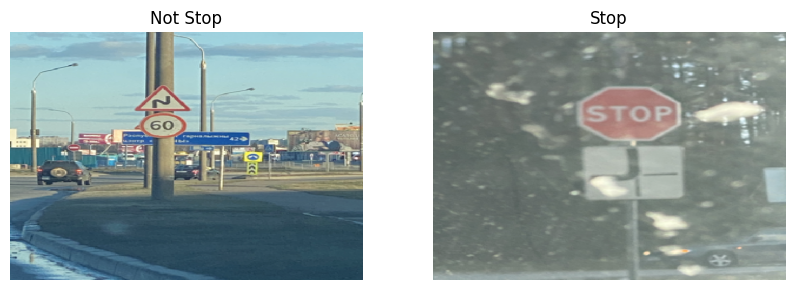

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# Define image dimensions
IMG_WIDTH = 640
IMG_HEIGHT = 450

# Define file paths for dataset
not_stop_path = './Dataset/not_stop/*.png'
stop_path = './Dataset/stop/*.png'

# Define function to load and preprocess image
def load_and_preprocess_image(filepath):
    # Load image as grayscale
    img = load_img(filepath, color_mode='rgb', target_size=(IMG_HEIGHT, IMG_WIDTH))
    # Convert image to numpy array
    img = img_to_array(img)
    # Normalize pixel values
    img = img / 255.0
    return img

# Load images and labels into lists
not_stop_images = []
stop_images = []
not_stop_labels = []
stop_labels = []
for filepath in tqdm(tf.io.gfile.glob(not_stop_path)):
    not_stop_images.append(load_and_preprocess_image(filepath))
    not_stop_labels.append(0)
for filepath in tqdm(tf.io.gfile.glob(stop_path)):
    stop_images.append(load_and_preprocess_image(filepath))
    stop_labels.append(1)

# Concatenate images and labels
images = not_stop_images + stop_images
labels = not_stop_labels + stop_labels

# Display one image from each class with label
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(not_stop_images[0])
plt.title('Not Stop')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(stop_images[0])
plt.title('Stop')
plt.axis('off')
plt.show()


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 13.46it/s]


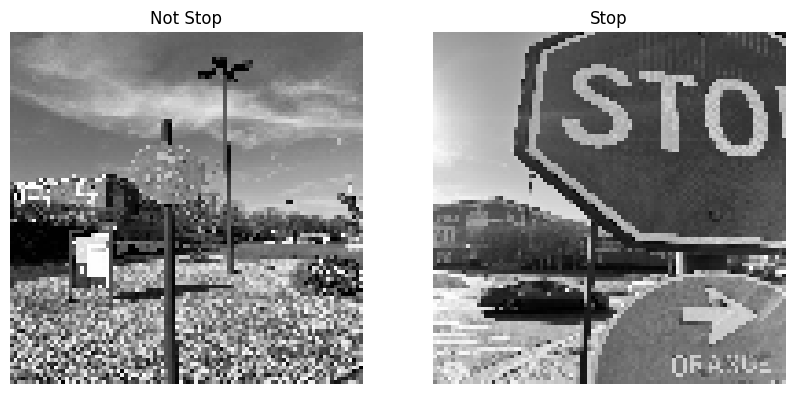

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# Define image dimensions
IMG_WIDTH = 96
IMG_HEIGHT = 96

# Define file paths for dataset
not_stop_path = './CustomDataset/not_stop/*.jpg'
stop_path = './CustomDataset/stop/*.jpg'

# Define function to load and preprocess image
def load_and_preprocess_image(filepath):
    # Load image as grayscale
    img = load_img(filepath, color_mode='grayscale', target_size=(IMG_HEIGHT, IMG_WIDTH))
    # Convert image to numpy array
    img = img_to_array(img)
    # Normalize pixel values
    img = img / 255.0
    return img

# Load images and labels into lists
not_stop_images = []
stop_images = []
not_stop_labels = []
stop_labels = []
for filepath in tqdm(tf.io.gfile.glob(not_stop_path)):
    not_stop_images.append(load_and_preprocess_image(filepath))
    not_stop_labels.append(0)
for filepath in tqdm(tf.io.gfile.glob(stop_path)):
    stop_images.append(load_and_preprocess_image(filepath))
    stop_labels.append(1)

# Concatenate images and labels
images = not_stop_images + stop_images
labels = not_stop_labels + stop_labels

# Display one image from each class with label
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(not_stop_images[0], cmap='gray')
plt.title('Not Stop')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(stop_images[0], cmap='gray')
plt.title('Stop')
plt.axis('off')
plt.show()


In [3]:
import random
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
random.seed(42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

# Convert data to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)

2023-03-28 19:29:00.187570: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-28 19:29:00.192044: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-28 19:29:00.192160: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-28 19:29:00.192705: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuil

In [4]:
print(X_train.shape)

(8, 96, 96, 1)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, Flatten, Dense

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.test.gpu_device_name())

# Define the model architecture
model = Sequential([
    SeparableConv2D(16, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    SeparableConv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    SeparableConv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2023-03-28 19:29:00.598961: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-28 19:29:00.599371: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-28 19:29:00.599595: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-28 19:29:00.599891: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-28 19:29:00.600108: I tensorflow/compiler/xla/stream_executo

2.11.0
/device:GPU:0


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separable  (None, 94, 94, 16)       41        
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 16)       0         
 )                                                               
                                                                 
 separable_conv2d_1 (Separab  (None, 45, 45, 32)       688       
 leConv2D)                                                       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 separable_conv2d_2 (Separab  (None, 20, 20, 64)       2

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


2023-03-28 19:29:02.305604: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8201
2023-03-28 19:29:03.691527: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-28 19:29:03.694882: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55fd6c61f3b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-28 19:29:03.694912: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2023-03-28 19:29:03.701882: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-28 19:29:03.797349: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the l

1/1 [==============================] - 5s 5s/step - loss: 0.6929 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 40ms/step - loss: 0.6898 - accuracy: 0.8750 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 40ms/step - loss: 0.6856 - accuracy: 1.0000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 45ms/step - loss: 0.6802 - accuracy: 1.0000 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 38ms/step - loss: 0.6736 - accuracy: 1.0000 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 41ms/step - loss: 0.6656 - accuracy: 1.0000 - val_loss: 0.6874 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 40ms/step - loss: 0.6561 - accuracy: 1.0000 - val_loss: 0.6846 - val_accuracy: 1.0000
Epoch 8/10
1/1 [========================

In [8]:
model.save("my_model.h5")